## **IBM HR Analytics Dataset**   [Source](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)


##  1. Importing Libraries

This section includes all the necessary libraries for data processing, visualization, machine learning, model evaluation, class balancing, and explainability.

---

## Data Manipulation
- **`pandas`**: For reading and manipulating structured data.
- **`numpy`**: For performing numerical operations.

---

## Data Visualization
- **`matplotlib.pyplot`**: Basic plotting library for visualizing data.
- **`seaborn`**: Advanced statistical plotting built on top of matplotlib.

---

##  Machine Learning (Scikit-Learn)
- **`train_test_split`**: Splits the dataset into training and testing sets.
- **`GridSearchCV`**: Performs hyperparameter tuning using cross-validation.
- **`StandardScaler`**: Standardizes features by removing the mean and scaling to unit variance.
- **`RandomForestClassifier`**: An ensemble learning method for classification using decision trees.
- **`classification_report`, `roc_auc_score`, `confusion_matrix`**: Evaluation metrics for classification models.

---

##  Handling Class Imbalance
- **`SMOTE (Synthetic Minority Oversampling Technique)`**: Generates synthetic examples for the minority class to balance the dataset.

---

##  Model Interpretability
- **`LIME (Local Interpretable Model-agnostic Explanations)`**: A tool to explain the predictions of machine learning models.

---

## General
- **`warnings`**: Used to suppress unwanted warning messages for cleaner output.


In [2]:
# Importing core data handling libraries
import pandas as pd                  # For data manipulation and analysis
import numpy as np                   # For numerical computations

# Importing visualization libraries
import matplotlib.pyplot as plt      # For plotting graphs
import seaborn as sns                # For advanced data visualization

# Importing machine learning utilities from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data & hyperparameter tuning
from sklearn.preprocessing import StandardScaler                    # For feature scaling
from sklearn.ensemble import RandomForestClassifier                 # For classification using random forest
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix  # For evaluation metrics

# Importing SMOTE from imbalanced-learn for oversampling the minority class
from imblearn.over_sampling import SMOTE  # For handling class imbalance

# Importing LIME for model explainability
import lime
import lime.lime_tabular                 # For explaining model predictions locally using tabular data

# Suppress warnings for clean output
import warnings
warnings.filterwarnings("ignore")       # Hides all warning messages for cleaner notebook display


## **2. Load Dataset**

In this section, we load the HR Employee Attrition dataset using `pandas`.

- The dataset is read from a `.csv` file located on the local system.
- The `df.head(10)` function returns the first 10 rows of the DataFrame, allowing a quick preview of the dataset's structure, columns, and sample values.



In [3]:
# Loading Dataset

# Load the dataset from the specified file path into a pandas DataFrame
df = pd.read_csv(r"G:\Other computers\My Laptop\Education and Bootcamp\Projects\Machine Learning Predictions\Predict Employee Attrition\WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Display the first 10 rows of the dataset to understand its structure and contents
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


## **3. Exploratory Data Analysis**

## Basic Dataset Information
This section provides a summary of the dataset's structure and quality:

- **`df.shape`**: Returns a tuple representing the number of rows and columns in the DataFrame.
- **`df.dtypes.value_counts()`**: Shows the count of each data type in the DataFrame, helping to understand the structure of features.
- **`df.isna().sum()[lambda x: x > 0]`**: Identifies columns with missing values and displays the count of missing entries per column.
- **`df.duplicated().sum()`**: Calculates the number of duplicate rows, which may need to be removed for cleaner analysis.
- **`df.columns`**: Lists all column names in the DataFrame.


In [4]:
#  3. Basic Dataset Information

# Display the shape of the DataFrame: number of rows and columns
display("Shape of Dataset", df.shape)

# Display the data types of each column and their frequency
display("Datatype of Dataset", df.dtypes.value_counts())

# Display columns that contain missing (NaN) values along with their counts
display("Null Values Percentage in Dataset", df.isna().sum()[lambda x: x > 0])

# Display the number of duplicate rows in the dataset
display("Duplication in Dataset", df.duplicated().sum())

# Display the names of all columns in the DataFrame
df.columns

'Shape of Dataset'

(1470, 35)

'Datatype of Dataset'

int64     26
object     9
Name: count, dtype: int64

'Null Values Percentage in Dataset'

Series([], dtype: int64)

'Duplication in Dataset'

np.int64(0)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### **Attrition Distribution**

This command uses `value_counts()` to display the frequency of each category in the **`Attrition`** column:

- Shows how many employees have left (`Yes`) versus those who stayed (`No`).
- The `dropna=False` parameter ensures that any missing values (if present) are also counted.

Understanding this distribution is essential for identifying class imbalance in the target variable.


In [5]:
#  Display the distribution of the target variable 'Attrition'
# This shows how many employees have left (Yes) vs stayed (No)
print("Attrition distribution:", df['Attrition'].value_counts(dropna=False))

Attrition distribution: Attrition
No     1233
Yes     237
Name: count, dtype: int64


### **Statistical Summary of Numerical Features**

This command uses `df.describe().T` to provide a statistical overview of all **numerical columns** in the dataset:

- Includes metrics like `count`, `mean`, `std` (standard deviation), `min`, `25%`, `50%` (median), `75%`, and `max`.
- The `.T` transposes the output for better readability — each row now represents a single feature.

This summary helps in understanding the range, central tendency, and spread of the data.


In [6]:
#  Display statistical summary of all numerical features
# Transposing the result (.T) makes it easier to read row-wise per feature
display("Statistical summary of numerical features:", df.describe().T)

'Statistical summary of numerical features:'

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


### **Statistical Summary of Categorical Features**

This command uses `df.describe(include=['object']).T` to display a summary of all **categorical columns** (i.e., columns with `object` data type):

- Shows key statistics such as `count`, `unique` (number of unique values), `top` (most frequent value), and `freq` (frequency of the top value).
- The `.T` transposes the result for improved readability, with each row representing one categorical feature.

This summary helps in identifying dominant categories, missing data, and feature variability.


In [7]:
#  Display statistical summary of categorical (object) features
# Transposing the result (.T) makes it easier to compare across features
display("Statistical Summary of categorical features:", df.describe(include=['object']).T)

'Statistical Summary of categorical features:'

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


### **Histograms of Key Numeric Features**

This section creates histograms for a selection of key numeric features in the dataset:

- **Features Visualized**: `Age`, `MonthlyIncome`, `DistanceFromHome`, `YearsAtCompany`, `TotalWorkingYears`.
- The `hist()` function generates histograms, and `bins=20` specifies that each histogram will have 20 bins to visualize the distribution.
- The `figsize=(10, 9)` argument sets the figure size for better clarity.
- The title, "Distributions of Key Numeric Features", is added to the entire set of histograms using `plt.suptitle()`.

Histograms are useful for understanding the distribution and spread of numerical data.


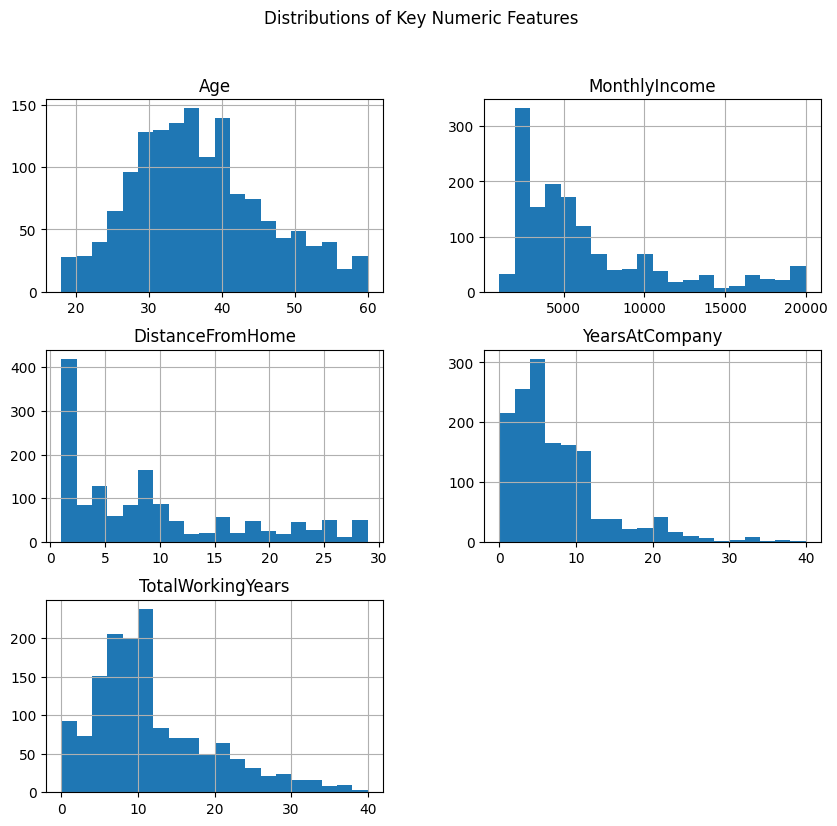

In [8]:
# Histograms of Key Numeric Features

# Define a list of key numeric features to visualize
numeric_feats = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany', 'TotalWorkingYears']

# Create histograms for each numeric feature in the list
# The 'bins=20' argument sets the number of bins for each histogram
# figsize=(10,9) defines the size of the figure
df[numeric_feats].hist(bins=20, figsize=(10, 9))

# Add a title to the entire figure
plt.suptitle('Distributions of Key Numeric Features')

# Display the plot
plt.show()


### **Box-plots: Numeric Features vs. Attrition**

In this section, we visualize the distribution of each numeric feature relative to **Attrition** (whether the employee left or stayed):

- **Numeric Features Plotted**: `Age`, `MonthlyIncome`, `DistanceFromHome`, `YearsAtCompany`, `TotalWorkingYears`.
- **Boxplot**: A boxplot is used to visualize the spread and central tendency of each numeric feature, showing the median, quartiles, and outliers based on whether the employee stayed (`Attrition = No`) or left (`Attrition = Yes`).
- **Layout**: The plots are arranged in a 2x3 grid for better organization, with titles indicating the feature being analyzed.

Boxplots are great for visualizing the distribution of data across different categories (in this case, Attrition).


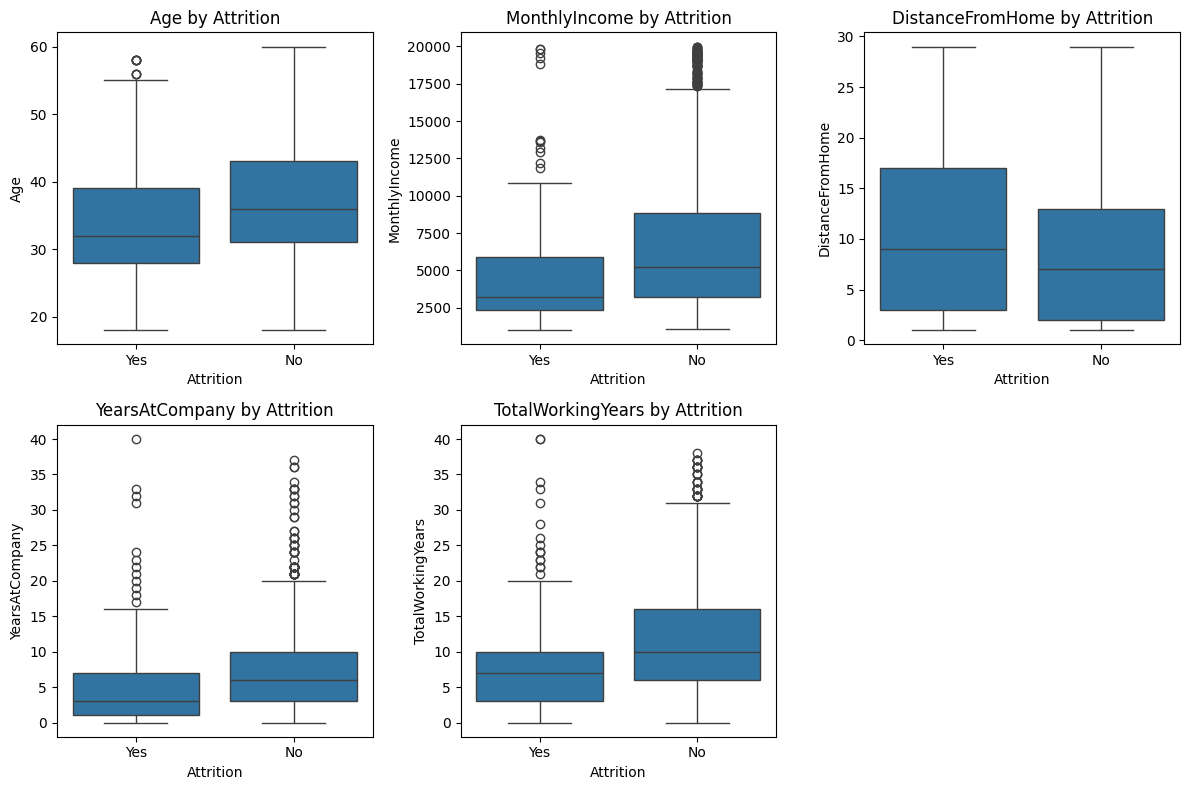

In [9]:
# Box-plots: Numeric Features vs. Attrition

# Set the figure size for the entire set of plots
plt.figure(figsize=(12, 8))

# Loop through each numeric feature to create box-plots
# 'enumerate' is used to get both the index and feature name for subplot placement
for i, feat in enumerate(numeric_feats, 1):
    plt.subplot(2, 3, i)  # Create a 2x3 grid of subplots
    sns.boxplot(x='Attrition', y=feat, data=df)  # Create a boxplot for each numeric feature vs. Attrition
    plt.title(f'{feat} by Attrition')  # Set title for each boxplot

# Adjust layout to avoid overlap of subplots
plt.tight_layout()

# Display the plots
plt.show()

###  **Count-plots for Important Categorical Features**

This section visualizes the distribution of several important categorical features with respect to **Attrition**:

- **Categorical Features Plotted**: `BusinessTravel`, `Department`, `JobRole`, `EducationField`, `OverTime`.
- **Countplot**: Each plot shows the count of occurrences of each category, with the hue representing whether the employee left (`Attrition = Yes`) or stayed (`Attrition = No`).
- **Layout**: The plots are arranged in a 3x2 grid, and the x-axis labels are rotated 45 degrees for better readability.

Countplots are useful for comparing the distribution of categorical features across different classes (Attrition in this case).


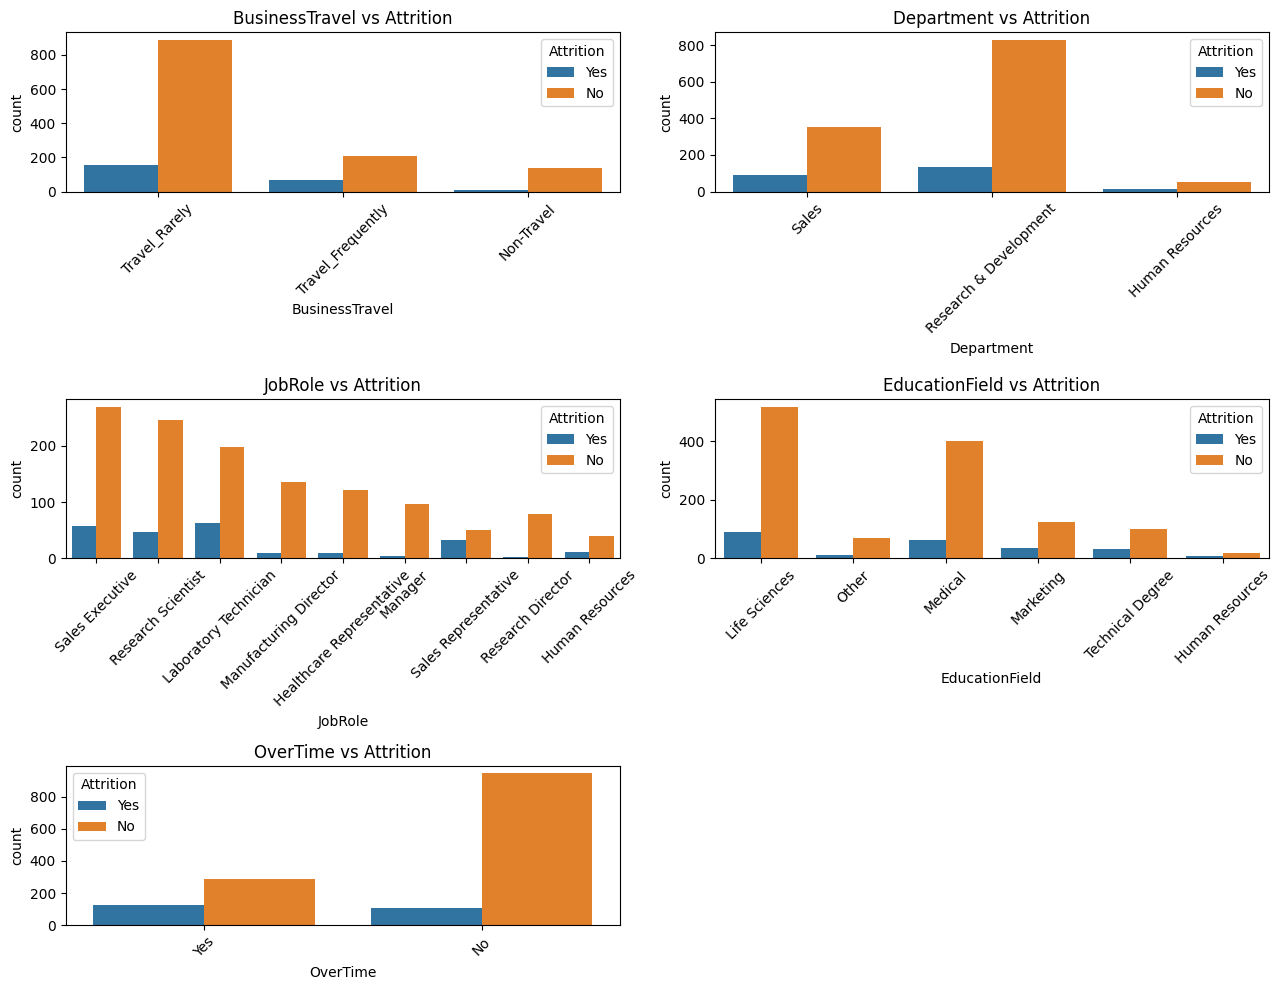

In [10]:
#  Count-plots for Important Categorical Features

# List of important categorical features
cat_feats = ['BusinessTravel', 'Department', 'JobRole', 'EducationField', 'OverTime']

# Set the figure size for the entire set of plots
plt.figure(figsize=(13, 10))

# Loop through each categorical feature to create count-plots
# 'enumerate' is used to get both the index and feature name for subplot placement
for i, feat in enumerate(cat_feats, 1):
    plt.subplot(3, 2, i)  # Create a 3x2 grid of subplots
    sns.countplot(x=feat, hue='Attrition', data=df)  # Create a countplot with Attrition as the hue
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.title(f'{feat} vs Attrition')  # Set title for each countplot

# Adjust layout to avoid overlap of subplots
plt.tight_layout()

# Display the plots
plt.show()

###  **Correlation Heatmap of Numeric Features**

In this section, we create a **correlation heatmap** to visually assess the relationships between numeric features in the dataset:

- **Correlation Matrix**: `df.select_dtypes(include='number').corr()` computes the pairwise correlation between numeric features.
- **Heatmap**: The `sns.heatmap()` function visualizes the correlation matrix. The `coolwarm` colormap is used to represent negative and positive correlations, with 0 representing no correlation.
- **Customization**: The `center=0` argument ensures the color scale is centered around zero, and `linewidths=0.2` adds slight separation between cells for clarity.

This heatmap helps identify potential relationships and collinearity between numeric variables.


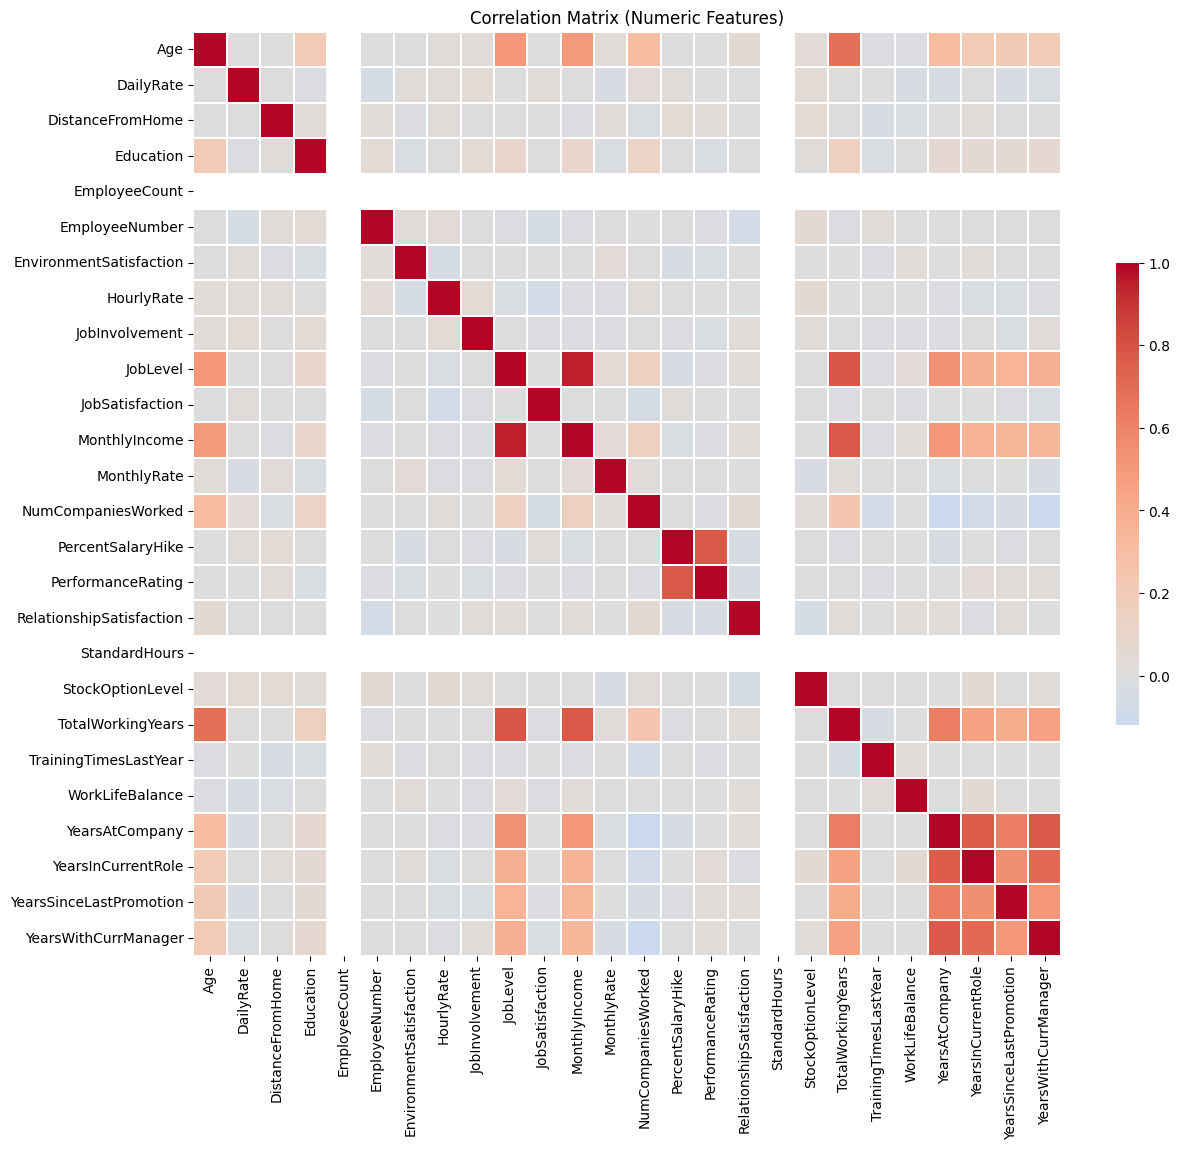

In [11]:
# Correlation Heatmap of Numeric Features

# Set the figure size for the heatmap
plt.figure(figsize=(14, 12))

# Calculate the correlation matrix for numeric features
corr = df.select_dtypes(include='number').corr()

# Create a heatmap to visualize the correlation matrix
# 'coolwarm' colormap is used, with center=0 to make the heatmap symmetric
sns.heatmap(corr, cmap='coolwarm', center=0,
            cbar_kws={'shrink': 0.5}, linewidths=0.2)

# Add title to the heatmap
plt.title('Correlation Matrix (Numeric Features)')

# Display the heatmap
plt.show()

## **3. Preprocessing**

In this step, we perform some basic preprocessing on the dataset:

- **Dropping Irrelevant Columns**: We remove the following columns as they do not contribute meaningful information to the analysis or model:
  - `EmployeeCount`: Identical for all rows.
  - `EmployeeNumber`: Unique identifier, not useful for prediction.
  - `Over18`: Constant value across all rows (18+ years).
  - `StandardHours`: Constant across all rows.
  
- **Encoding the 'Attrition' Column**: We map the `Attrition` values (`'Yes'` and `'No'`) to numeric values (`1` for `'Yes'` and `0` for `'No'`) to prepare the data for machine learning models.

This preprocessing step is essential for preparing the data for further analysis or modeling.


In [12]:
#  Preprocessing

# Drop irrelevant columns that won't contribute to the analysis or model
drop_cols = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df = df.drop(columns=drop_cols)

# Encode the 'Attrition' column: 'Yes' becomes 1 and 'No' becomes 0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

###  **One-hot Encoding of Categorical Variables**

This step involves converting categorical variables into a format that can be used by machine learning models:

- **Selecting Categorical Columns**: We identify columns with the `object` data type, which usually indicates categorical features.
  
- **One-hot Encoding**: We use `pd.get_dummies()` to create a binary (0 or 1) column for each category in the selected categorical columns.
  - `drop_first=True`: This parameter drops the first category to avoid multicollinearity (i.e., creating redundant columns).
  
One-hot encoding is a crucial preprocessing step for transforming categorical data into a machine-readable format.


In [13]:
# One-hot Encode Categorical Variables

# Select columns with categorical data type (object)
cat_cols = df.select_dtypes(include='object').columns

# Apply one-hot encoding to the selected categorical columns
# drop_first=True ensures we avoid multicollinearity by dropping the first category in each feature
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


### **Scaling of Numeric Features**

In this step, we standardize the numeric features to bring them to a common scale:

- **Selecting Numeric Columns**: We identify numeric columns (excluding the `Attrition` column) for scaling.
  
- **Standardization**: The `StandardScaler` from scikit-learn is used to standardize the selected numeric features. This transforms each feature to have a mean of 0 and a standard deviation of 1.
  
Standardization is crucial for algorithms that are sensitive to the scale of features (e.g., distance-based models like k-NN or gradient-based models like neural networks).


In [14]:
# Scale Numeric Features

# Select numeric columns (excluding 'Attrition')
num_cols = df.select_dtypes(include=np.number).columns.drop('Attrition')

# Initialize a StandardScaler to standardize the numeric features
scaler = StandardScaler()

# Apply the scaler to the selected numeric columns
df[num_cols] = scaler.fit_transform(df[num_cols])


### **4. Train/Test Split & Resampling**

This step involves splitting the data into training and testing sets and applying resampling techniques to handle class imbalance:

- **Train/Test Split**: The dataset is split into a training set (75%) and a testing set (25%) using `train_test_split()`. 
  - `stratify=y`: Ensures that the proportion of classes (Attrition) is preserved in both the training and testing sets.
  
- **Resampling with SMOTE**: We apply **SMOTE (Synthetic Minority Over-sampling Technique)** to the training set to address class imbalance. SMOTE generates synthetic examples for the minority class (Attrition=1), ensuring a balanced distribution of classes in the training data.

This ensures the model is trained on a balanced dataset, reducing bias toward the majority class.


In [15]:
# Train/Test Split & Resampling

# Define the features (X) and target (y)
X = df.drop('Attrition', axis=1)  # Features: Drop 'Attrition' from the dataframe
y = df['Attrition']  # Target: 'Attrition' column

# Split the data into training and testing sets (25% for testing, 75% for training)
# 'stratify=y' ensures the split maintains the distribution of 'Attrition' in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the training data
# This generates synthetic samples for the minority class (Attrition=1)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

### **5. Model Training: Random Forest**

In this step, we train a **Random Forest classifier** with the following parameters:

- **n_estimators=200**: The number of trees in the forest. A higher number of trees improves performance but increases computational cost.
- **max_depth=8**: The maximum depth of each tree. Limiting depth helps prevent overfitting, ensuring the model generalizes well.
- **class_weight='balanced'**: This parameter adjusts the weight of each class in the model to account for class imbalance, making the model more sensitive to the minority class (Attrition=1).
- **random_state=42**: Ensures reproducibility of results.

The model is then trained on the **resampled training data** (which has a balanced class distribution due to SMOTE).


In [16]:
# Model Training: Random Forest

# Initialize the RandomForestClassifier with specific hyperparameters
rf = RandomForestClassifier(
    n_estimators=200,        # Number of trees in the forest
    max_depth=8,             # Maximum depth of each tree to prevent overfitting
    class_weight='balanced', # Adjust weights inversely proportional to class frequencies to handle imbalanced classes
    random_state=42          # For reproducibility of results
)

# Train the Random Forest model on the resampled training data
rf.fit(X_train_res, y_train_res)


RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=200,
                       random_state=42)

### **6. Model Evaluation**

In this step, we evaluate the performance of the trained **Random Forest model** on the test set:

- **Predictions**:
  - `y_pred`: The predicted labels for the test set (`0` for no attrition, `1` for attrition).
  - `y_proba`: The predicted probabilities for the positive class (attrition, `1`). These are used for calculating the ROC-AUC score.

- **Classification Report**: The `classification_report()` provides a detailed summary of the model's performance, including precision, recall, F1-score, and support for each class.

- **ROC-AUC Score**: The `roc_auc_score()` evaluates the model's ability to distinguish between the two classes. A higher score indicates better model performance.

These evaluation metrics help assess the model's ability to predict attrition accurately.


In [17]:
# Evaluation

# Predict the target labels (Attrition) on the test set
y_pred = rf.predict(X_test)

# Predict the probability of the positive class (Attrition=1) on the test set
y_proba = rf.predict_proba(X_test)[:, 1]

# Print the classification report for the Random Forest model
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred))

# Print the ROC-AUC score for the Random Forest model
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.3f}")


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       309
           1       0.56      0.32      0.41        59

    accuracy                           0.85       368
   macro avg       0.72      0.64      0.66       368
weighted avg       0.83      0.85      0.83       368

ROC-AUC Score: 0.787


### **Confusion Matrix Visualization**

The confusion matrix is a useful tool for evaluating the performance of classification models, particularly in terms of false positives and false negatives:

- **Confusion Matrix**: This matrix compares the true labels (`y_test`) with the predicted labels (`y_pred`). It helps in identifying how many predictions fall into each of the following categories:
  - **True Positives (TP)**: Correctly predicted attrition (`Attrition=1`).
  - **True Negatives (TN)**: Correctly predicted no attrition (`Attrition=0`).
  - **False Positives (FP)**: Incorrectly predicted attrition when the true label was no attrition.
  - **False Negatives (FN)**: Incorrectly predicted no attrition when the true label was attrition.

- **Visualization**: The matrix is visualized using a heatmap with color intensity representing the values in the matrix. The axes are labeled with `True` and `Predicted` classes (`No Attrition` and `Attrition`).

The confusion matrix helps assess the accuracy of the classification model and identify areas of improvement, such as handling false positives or false negatives.


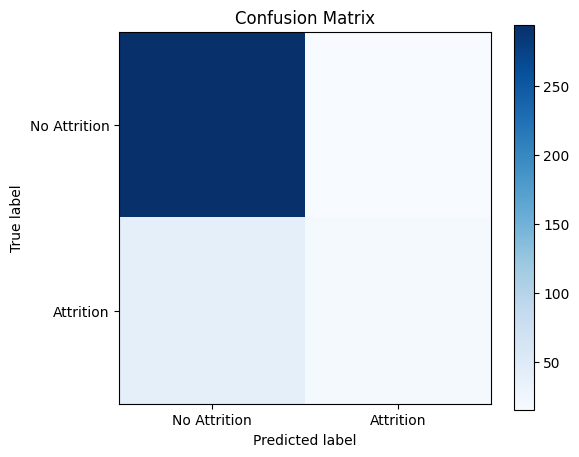

In [18]:
#  Confusion Matrix Visualization

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure for the confusion matrix
plt.figure(figsize=(6,5))

# Plot the confusion matrix using a heatmap (with color intensity based on values)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add title and color bar
plt.title('Confusion Matrix')
plt.colorbar()

# Set tick marks and labels for the axes (True and Predicted labels)
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Attrition', 'Attrition'])
plt.yticks(tick_marks, ['No Attrition', 'Attrition'])

# Label the axes
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Display the plot
plt.show()


### **7. Explainability with LIME**

In this step, we use **LIME (Local Interpretable Model-agnostic Explanations)** to explain the predictions of the trained model:

- **LIME Explainer**: LIME is a technique that helps to understand the predictions of complex machine learning models by approximating them locally using simpler, interpretable models.

- **Initialization**: 
  - `training_data`: The resampled training data (`X_train_res`) is used to train the explainer.
  - `feature_names`: The names of the features from the dataset (`X.columns`).
  - `class_names`: The labels for the two classes in the target variable (`No Attrition` and `Attrition`).
  - `mode='classification'`: Specifies that the task is classification, as we are predicting employee attrition.

LIME helps generate explanations for individual predictions, which is crucial for understanding why the model is making specific decisions and building trust with stakeholders.


In [19]:
#  Explainability with LIME

# Initialize the LIME explainer for tabular data
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = np.array(X_train_res),  # Resampled training data
    feature_names = X.columns,              # Feature names from the training set
    class_names = ['No Attrition', 'Attrition'],  # Class labels for the target
    mode = 'classification'                 # Mode is classification since we're predicting attrition
)

### **LIME Target Selection: Diverse Examples for Interpretation**

To better understand the behavior of the Random Forest model using LIME, we select a variety of prediction instances for explanation:

1. **High Risk Cases**: Top 5 instances with the highest predicted probability of attrition.
2. **Low Risk Cases**: Top 5 instances with the lowest predicted probability of attrition.
3. **Borderline Cases**: 5 predictions where the probability is closest to 0.5, representing model uncertainty.
4. **Misclassifications**: Up to 5 randomly selected examples where the model predicted incorrectly.

These selected instances provide a well-rounded set of cases:
- Clear decisions (high/low probability),
- Ambiguous predictions (borderline),
- and errors (misclassifications).

This approach ensures we explore not just where the model is confident, but also where it struggles — crucial for improving trust and performance.


In [20]:
# Select Cases for LIME Explanation

# 1️⃣ Get the indices of top 5 predictions with the highest probability of attrition
high_risk_idx = np.argsort(y_proba)[-5:]

# 2️⃣ Get the indices of top 5 predictions with the lowest probability of attrition
low_risk_idx = np.argsort(y_proba)[:5]

# 3️⃣ Find 5 predictions closest to borderline (probability near 0.5)
borderline_idx = np.argsort(np.abs(y_proba - 0.5))[:5]

# 4️⃣ Identify misclassifications (where predicted class ≠ actual class)
mis_idx = np.where(y_pred != y_test.values)[0]

# Randomly sample up to 5 misclassified examples
np.random.seed(42)
mis_idx_sample = np.random.choice(mis_idx, size=min(5, len(mis_idx)), replace=False)

# 🔄 Combine all selected cases into a single array and remove duplicates
selected_indices = np.unique(
    np.concatenate([high_risk_idx, low_risk_idx, borderline_idx, mis_idx_sample])
)

print("Selected LIME instances:", selected_indices)


Selected LIME instances: [ 10  25  42  59  89 109 149 178 183 207 214 223 229 276 301 325 330 334
 346 350]


### **Instance-level Explanation using LIME**

We now interpret predictions made by the Random Forest model using **LIME** (Local Interpretable Model-agnostic Explanations) for the selected test instances.

For each instance:
- **LIME** generates a local surrogate model that explains how features contribute to the prediction.
- We visualize the top 10 contributing features for each case.

Each explanation includes:
- The **true label**, the **predicted class**, and the **predicted probability** of attrition.
- A **bar plot** showing the most influential features (positive or negative) in driving the prediction.

This step is vital for:
- Understanding the **why** behind model decisions.
- Communicating model behavior to stakeholders in an interpretable way.
- Building trust and ensuring fairness in predictive HR analytics.


In [22]:
for i in selected_indices:
    exp = lime_explainer.explain_instance(
        X_test.iloc[i].values,
        rf.predict_proba,
        num_features=10
    )

    print(f"\n--- Explanation for test instance {i} "
          f"(true: {y_test.iloc[i]}, pred: {y_pred[i]}, proba: {y_proba[i]:.2f})")

    # Save the LIME explanation as an image
    fig = exp.as_pyplot_figure()
    fig.savefig(f"lime_instance_{i}.png", bbox_inches='tight')  # 🔸 Save PNG
    plt.close(fig)  # 🔸 Close the figure to free memory



--- Explanation for test instance 10 (true: 1, pred: 1, proba: 0.91)

--- Explanation for test instance 25 (true: 0, pred: 0, proba: 0.49)

--- Explanation for test instance 42 (true: 0, pred: 0, proba: 0.49)

--- Explanation for test instance 59 (true: 1, pred: 0, proba: 0.15)

--- Explanation for test instance 89 (true: 1, pred: 1, proba: 0.74)

--- Explanation for test instance 109 (true: 1, pred: 0, proba: 0.26)

--- Explanation for test instance 149 (true: 0, pred: 1, proba: 0.58)

--- Explanation for test instance 178 (true: 0, pred: 0, proba: 0.04)

--- Explanation for test instance 183 (true: 0, pred: 0, proba: 0.04)

--- Explanation for test instance 207 (true: 0, pred: 0, proba: 0.04)

--- Explanation for test instance 214 (true: 1, pred: 1, proba: 0.90)

--- Explanation for test instance 223 (true: 1, pred: 0, proba: 0.45)

--- Explanation for test instance 229 (true: 1, pred: 0, proba: 0.46)

--- Explanation for test instance 276 (true: 1, pred: 0, proba: 0.49)

--- Explan